In [77]:
import matplotlib.pyplot as plt
import librosa 

%load_ext autoreload
%autoreload 2

from audio_transport.gen_utils import gen_sinewave
from audio_transport.plot_utils import plot_spectogram, plot_progression
from audio_transport.transport_utils import join_stfts, transport, stft

import IPython.display as ipd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Interpolates between two chords composed of generated sine waves. The first maps three notes to three notes and the second maps four notes to three notes.

In [78]:
x1 = gen_sinewave([523, 659, 784, 988], 4, 44100) * 0.2 
x2 = gen_sinewave([587, 698, 880], 4, 44100) * 0.2

s1, S_db1 = stft(x1)
s2, S_db2 = stft(x2)

In [ ]:
transport(x1, x2, 4, 4, 0.5, 44100, plot=3, correct_phase=None, write_file='interpolated_samples/test1.wav')

Mass of signal 1: 1694.5302810944443
Mass of signal 2: 1270.4510219113356


In [ ]:
ipd.Audio('interpolated_samples/test1.wav')

In [ ]:
x1 = gen_sinewave([261.63, 293.66*1.5, 329.63*2],  4, 44100) * 0.2 
x2 = gen_sinewave([587, 698, 880], 4, 44100) * 0.2

s1, S_db1 = stft(x1)
s2, S_db2 = stft(x2)

In [ ]:
transport(x1, x2, 4, 4, 0.5, 44100, plot=3, correct_phase=None, write_file='interpolated_samples/test2.wav')

In [ ]:
ipd.Audio('interpolated_samples/test2.wav')

Interpolates between two songs

In [ ]:
audio, sr = librosa.load("audio_samples/loop_tudoq.wav", sr=44100)
audio2, sr2 = librosa.load("audio_samples/tunum.wav", sr=44100)

Mass of signal 1: 73.8054
Mass of signal 2: 1436.7063


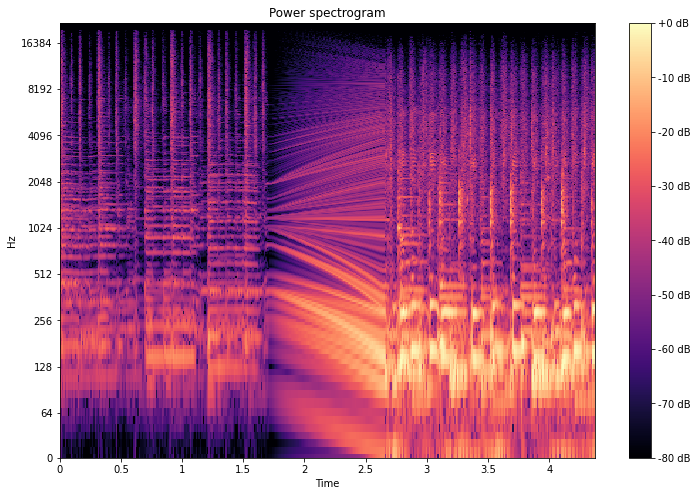

In [62]:
transport(audio, audio2, 4, 4, 2, 44100, plot=3, write_file='interpolated_samples/test3.wav', correct_phase=None)

In [63]:
ipd.Audio('interpolated_samples/test3.wav')

Interpolates between two string samples

In [54]:

audio, sr = librosa.load("audio_samples/P6 Pop 1 Strings C4.wav", sr=44100)
audio2, sr2 = librosa.load("audio_samples/P6 Pop 1 Strings C6.wav", sr=44100)

Mass of signal 1: 752.02325
Mass of signal 2: 266.79456


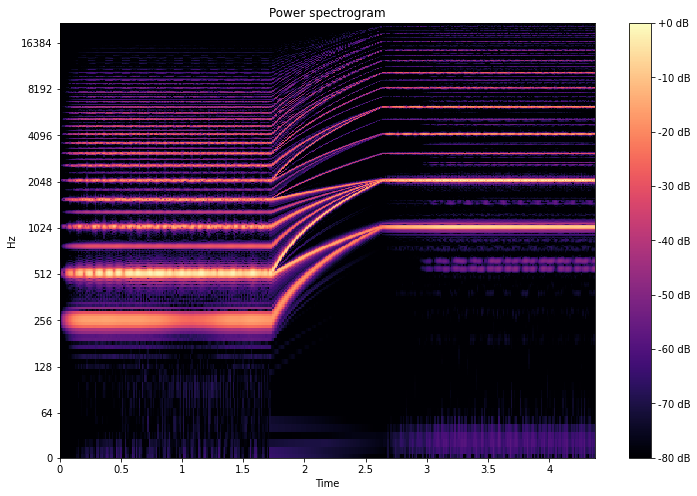

In [55]:
transport(audio, audio2, 4, 4, 2, 44100, plot=3, write_file='interpolated_samples/test4.wav', correct_phase=None)

In [56]:
ipd.Audio('interpolated_samples/test4.wav')